In [61]:
# For sending GET requests from the API
import requests
# For saving access tokens and for file management when creating and adding to the dataset
import os
# For dealing with json responses we receive from the API
import json
# For displaying the data after
import numpy as np
import pandas as pd
# For saving the response data in CSV format
import csv
# For parsing the dates received from twitter in readable formats
import datetime
import dateutil.parser
import unicodedata
#To add wait time between requests
import time
#Imports timer
import tqdm
#To do Regex
import re
#To do sentiment analysis
from textblob import TextBlob

import matplotlib.pyplot as plt 
import seaborn as sns

## Import data from CSV file to a DataFrame

In [62]:
twitter_df = pd.read_csv('Cleaned_Twitter_Scrape_10-12_2021.csv')
twitter_df.sample(5)

,Unnamed: 0,User,Date Created,Number of Likes,Tweet,Date,Hour,Sentiment,Numerical
498347,498347,TisSpring,2021-11-29 21:23:33+00:00,0,@TOPDOGE007 @davidgokhshtein @xMooneyToken Um ...,2021-11-29,21,negative,-1
644493,644493,therealDBcoop,2021-11-18 16:39:40+00:00,6,@ChrisRandone Doge bonk coin $DOBO,2021-11-18,16,neutral,0
135568,135568,YamizuG,2021-12-15 08:48:41+00:00,0,@cryptogems555 Absolutely lord doge 👀 @LordDog...,2021-12-15,8,positive,1
3623,3623,SimarinerGY,2021-12-31 13:41:17+00:00,0,@GeordieMariner @doge_cola Cheers mate. It’s a...,2021-12-31,13,positive,1
71685,71685,jacky95743388,2021-12-23 02:30:32+00:00,0,@RosarioXiomar @dogecoin @cliffordinu_io @elon...,2021-12-23,2,positive,1


In [19]:
keep_columns = ['User', 'Date Created', 'Tweet', 'Date', 'Hour', 'Sentiment', 'Numerical']

twitter_df_dates = twitter_df[keep_columns].copy()


,User,Date Created,Tweet,Date,Hour,Sentiment,Numerical
0,DogecoinCuban,2021-12-31 23:59:58+00:00,@Rodolfo07351753 @sodogetip tip @Rodolfo073517...,2021-12-31,23,neutral,0
1,RNY1117,2021-12-31 23:59:47+00:00,HAPPY NEW DOGE YEAR,2021-12-31,23,positive,1
2,bojodus,2021-12-31 23:59:37+00:00,"Prayers Up for XRP, DOGE , SHIB \nx1000 to the...",2021-12-31,23,neutral,0
3,CryptoCapflow,2021-12-31 23:59:09+00:00,"[Spot] By 2021-12-31 14:00 GMT, DOGE total tra...",2021-12-31,23,neutral,0
4,CarlosS74671189,2021-12-31 23:59:04+00:00,@Darlene_Pizarro How much Doge would you like ...,2021-12-31,23,positive,1
...,...,...,...,...,...,...,...
1194430,FraxinusE,2021-10-20 15:16:21+00:00,@RichAvatar_ Doge,2021-10-20,15,neutral,0
1194431,realDogecoinOG,2021-10-20 15:16:19+00:00,Chart of Open Interests or the huge pump on pe...,2021-10-20,15,positive,1
1194432,jalantrading,2021-10-20 15:16:13+00:00,DOGE https://t.co/jmoMMslmTs,2021-10-20,15,neutral,0
1194433,LeviKrull,2021-10-20 15:16:05+00:00,Bought a doge miner with doge today,2021-10-20,15,neutral,0


In [22]:
twitter_df_dates.set_index('Date', inplace=True)
twitter_df_dates

,User,Date Created,Tweet,Hour,Sentiment,Numerical
Date,,,,,,
2021-12-31,DogecoinCuban,2021-12-31 23:59:58+00:00,@Rodolfo07351753 @sodogetip tip @Rodolfo073517...,23,neutral,0
2021-12-31,RNY1117,2021-12-31 23:59:47+00:00,HAPPY NEW DOGE YEAR,23,positive,1
2021-12-31,bojodus,2021-12-31 23:59:37+00:00,"Prayers Up for XRP, DOGE , SHIB \nx1000 to the...",23,neutral,0
2021-12-31,CryptoCapflow,2021-12-31 23:59:09+00:00,"[Spot] By 2021-12-31 14:00 GMT, DOGE total tra...",23,neutral,0
2021-12-31,CarlosS74671189,2021-12-31 23:59:04+00:00,@Darlene_Pizarro How much Doge would you like ...,23,positive,1
...,...,...,...,...,...,...
2021-10-20,FraxinusE,2021-10-20 15:16:21+00:00,@RichAvatar_ Doge,15,neutral,0
2021-10-20,realDogecoinOG,2021-10-20 15:16:19+00:00,Chart of Open Interests or the huge pump on pe...,15,positive,1
2021-10-20,jalantrading,2021-10-20 15:16:13+00:00,DOGE https://t.co/jmoMMslmTs,15,neutral,0


In [54]:
twitter_df['lol'] = str(twitter_df['Date Created'].loc[0:3])

In [63]:
twitter_df['Rounded_Date_Hour'] = [str[:-11]+'00:00' for str in twitter_df['Date Created']]

In [65]:
twitter_df['Rounded_Date_Hour'] = pd.to_datetime(twitter_df['Rounded_Date_Hour'])

In [25]:
binance_df = pd.read_csv('bprice.csv')
binance_df.set_index('Date', inplace=True)

In [26]:
binance_df

,Close,Hour
Date,,
2021-10-20,0.2431,0
2021-10-20,0.2432,1
2021-10-20,0.2422,2
2021-10-20,0.2428,3
2021-10-20,0.2435,4
...,...,...
2021-12-29,0.1726,20
2021-12-29,0.1713,21
2021-12-29,0.1713,22


In [47]:
twitter_df.groupby()

,Unnamed: 0,User,Date Created,Number of Likes,Tweet,Date,Hour,Sentiment,Numerical
0,0,DogecoinCuban,2021-12-31 23:59:58+00:00,1,@Rodolfo07351753 @sodogetip tip @Rodolfo073517...,2021-12-31,23,neutral,0
1,1,RNY1117,2021-12-31 23:59:47+00:00,2,HAPPY NEW DOGE YEAR,2021-12-31,23,positive,1
2,2,bojodus,2021-12-31 23:59:37+00:00,0,"Prayers Up for XRP, DOGE , SHIB \nx1000 to the...",2021-12-31,23,neutral,0
3,3,CryptoCapflow,2021-12-31 23:59:09+00:00,0,"[Spot] By 2021-12-31 14:00 GMT, DOGE total tra...",2021-12-31,23,neutral,0
4,4,CarlosS74671189,2021-12-31 23:59:04+00:00,1,@Darlene_Pizarro How much Doge would you like ...,2021-12-31,23,positive,1
...,...,...,...,...,...,...,...,...,...
1194430,1194430,FraxinusE,2021-10-20 15:16:21+00:00,0,@RichAvatar_ Doge,2021-10-20,15,neutral,0
1194431,1194431,realDogecoinOG,2021-10-20 15:16:19+00:00,4,Chart of Open Interests or the huge pump on pe...,2021-10-20,15,positive,1
1194432,1194432,jalantrading,2021-10-20 15:16:13+00:00,0,DOGE https://t.co/jmoMMslmTs,2021-10-20,15,neutral,0
1194433,1194433,LeviKrull,2021-10-20 15:16:05+00:00,0,Bought a doge miner with doge today,2021-10-20,15,neutral,0


In [68]:
sentiment_per_hour_df = twitter_df['Numerical'].groupby(twitter_df['Rounded_Date_Hour']).sum()

In [69]:
sentiment_per_hour_df

Rounded_Date_Hour
2021-10-20 15:00:00    145
2021-10-20 16:00:00    191
2021-10-20 17:00:00    153
2021-10-20 18:00:00    153
2021-10-20 19:00:00    177
                      ... 
2021-12-31 19:00:00    140
2021-12-31 20:00:00    214
2021-12-31 21:00:00    180
2021-12-31 22:00:00    132
2021-12-31 23:00:00    136
Name: Numerical, Length: 1737, dtype: int64

In [71]:
binance_df

,Close,Hour
Date,,
2021-10-20,0.2431,0
2021-10-20,0.2432,1
2021-10-20,0.2422,2
2021-10-20,0.2428,3
2021-10-20,0.2435,4
...,...,...
2021-12-29,0.1726,20
2021-12-29,0.1713,21
2021-12-29,0.1713,22


<AxesSubplot:xlabel='Rounded_Date_Hour'>

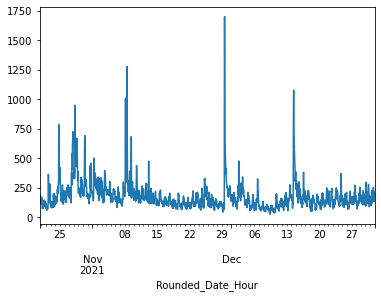

In [70]:
sentiment_per_hour_df.plot()